In [96]:
import pandas as pd
import requests
import json
import numpy as np
from uszipcode import SearchEngine
import matplotlib.pyplot as plt


In [2]:
arrest_file = "LA Arrest Data 2018.csv"

In [68]:
crimedf = pd.read_csv(arrest_file, encoding='utf8')


Report ID                     int64
Arrest Date                  object
Time                        float64
Area ID                       int64
Area Name                    object
Reporting District            int64
Age                           int64
Sex Code                     object
Descent Code                 object
Charge Group Code           float64
Charge Group Description     object
Arrest Type Code             object
Charge                       object
Charge Description           object
Address                      object
Cross Street                 object
Location                     object
Lat                         float64
Lng                         float64
dtype: object

In [5]:
# Remove arrest location without lat,lng
crimedf = crimedf[crimedf.Lat != 0]

In [6]:
#Using USZipCode to loop through crime data.
    #reversegeo lookup of incident cooridnates to find zip code and population
    #Already ran this once which is why this is quoted out
'''# Loop through rows using USzip to get new data
search = SearchEngine(simple_zipcode=True)
for index,row in crimedf.iterrows():
    query = search.by_coordinates(row['Lat'], row['Lng'], radius=30, returns=1)
    crimedf.loc[index,"Zip Code"] = query[0].zipcode
    crimedf.loc[index,"Population"] = query[0].population
    crimedf.loc[index,"City"] = query[0].major_city
    crimedf.loc[index,"County"] = query[0].county'''

'# Loop through rows using USzip to get new data\nsearch = SearchEngine(simple_zipcode=True)\nfor index,row in crimedf.iterrows():\n    query = search.by_coordinates(row[\'Lat\'], row[\'Lng\'], radius=30, returns=1)\n    crimedf.loc[index,"Zip Code"] = query[0].zipcode\n    crimedf.loc[index,"Population"] = query[0].population\n    crimedf.loc[index,"City"] = query[0].major_city\n    crimedf.loc[index,"County"] = query[0].county'

In [7]:
#ran this once 
#crimedf.to_csv('LA Arrest Data 2018_Clean.csv')

In [8]:
New_arrest_file = ('LA Arrest Data 2018_Clean.csv')

In [9]:
crimedf_clean = pd.read_csv(New_arrest_file, encoding='utf8')

In [10]:
#Create new table of zip,city, zip Population for later merge
City_info_Summary_df = crimedf_clean[['Zip Code','City','Population','County']].drop_duplicates()

In [12]:
crimedf_clean.head()

,Unnamed: 0,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Charge Description,Address,Cross Street,Location,Lat,Lng,Zip Code,Population,City,County
0,0,5192940,1/1/2018,1625.0,11,Northeast,1123,27,M,H,...,TRANSPORT/SELL/ETC CONTROLLED SUBSTANCE,3900 BRUNSWICK AV,NaN,"(34.123, -118.264)",34.1230,-118.2640,90039,28514.0,Los Angeles,Los Angeles County
1,1,5192650,1/1/2018,1400.0,18,Southeast,1822,25,M,H,...,BURGLARY FROM VEHICLE,CENTURY BL,BROADWAY,"(33.9456, -118.2781)",33.9456,-118.2781,90044,89779.0,Los Angeles,Los Angeles County
2,2,5192692,1/1/2018,845.0,7,Wilshire,702,37,M,H,...,DUI ALCOHOL/DRUGS W/INJURY,MELROSE,GARDNER,"(34.0837, -118.3532)",34.0837,-118.3532,90036,36865.0,Los Angeles,Los Angeles County
3,3,5192949,1/1/2018,1810.0,3,Southwest,332,57,M,B,...,BURGLARY,3000 POTOMAC AV,NaN,"(34.0276, -118.3439)",34.0276,-118.3439,90016,47596.0,Los Angeles,Los Angeles County
4,4,5192436,1/1/2018,120.0,13,Newton,1362,27,M,H,...,VIOLATION OF PAROLE:FELONY,5100 AVALON BL,NaN,"(33.9981, -118.2697)",33.9981,-118.2697,90011,103892.0,Los Angeles,Los Angeles County


In [15]:
City_info_Summary_df.to_csv('Zip Info Summary.csv')
City_info_Summary_df.head()

,Zip Code,City,Population,County
0,90039,Los Angeles,28514.0,Los Angeles County
1,90044,Los Angeles,89779.0,Los Angeles County
2,90036,Los Angeles,36865.0,Los Angeles County
3,90016,Los Angeles,47596.0,Los Angeles County
4,90011,Los Angeles,103892.0,Los Angeles County


In [71]:
#Create Incident summary dataframe
Incidents_by_Zip = crimedf_clean.groupby('Zip Code').count()['Sex Code']
Incidents_by_Zip_clean = pd.DataFrame({'Zip Code':Incidents_by_Zip.index, '# of Incidents':Incidents_by_Zip.values})
Incidents_by_Zip_clean.head()


,Zip Code,# of Incidents
0,90001,395
1,90002,837
2,90003,2953
3,90004,1173
4,90005,940


In [19]:
#Create Dispensary Count summary dataframe
Dispendarydf = pd.read_csv('marijuana_dispensaries_w_coords.csv', encoding='utf8')
Dispendarydf_clean = Dispendarydf[Dispendarydf.County =='LOS ANGELES'] #filter DF for only those in LA County
Dispendarydf_clean.head()


,Unnamed: 0,License Number,License Type,Business Owner,Business Contact Information,Business Structure,Premise Address,CA,Zip Code,County_with leading space,County,Status,Issue Date,Expiration Date,Activities,Adult-Use/Medicinal,Latitude,Longitude
3,3,C10-18-0000288-TEMP,Cannabis - Retailer Temporary License,Basil Bailey,ORIGINAL BALBOA CAREGIVERS : Email- balboacare...,Corporation,9419 MASON AVE CHATSWORTH,CA,91311,LOS ANGELES,LOS ANGELES,Active,12/31/2018,7/29/2019,N/A for this license type,BOTH,34.241268,-118.580710
6,6,C10-18-0000291-TEMP,Cannabis - Retailer Temporary License,Maria Colvin,"Hollywood Holistic Healers, Inc. : Email- holl...",Corporation,8210 W SUNSET BLVD LOS ANGELES,CA,90046,LOS ANGELES,LOS ANGELES,Active,12/31/2018,7/29/2019,N/A for this license type,BOTH,34.097766,-118.367984
7,7,C10-18-0000292-TEMP,Cannabis - Retailer Temporary License,David Barakett,"THE AIRPORT COLLECTIVE, INC. : Email- longbeac...",Corporation,3411 ANAHEIM ST LONG BEACH,CA,90804,LOS ANGELES,LOS ANGELES,Active,12/31/2018,7/29/2019,N/A for this license type,BOTH,33.783170,-118.152108
13,13,C10-18-0000278-TEMP,Cannabis - Retailer Temporary License,Shaun Lang,"Strain Balboa Caregivers, Inc. : Email- nuashx...",Corporation,21627 DEVONSHIRE ST CHATSWORTH,CA,91311,LOS ANGELES,LOS ANGELES,Active,12/29/2018,7/27/2019,N/A for this license type,BOTH,34.257461,-118.601340
14,14,C10-18-0000279-TEMP,Cannabis - Retailer Temporary License,Robert Rosenheck,"REDWOOD RETAIL, LLC : Lord Jones : Email- mon...",Limited Liability Company,8300 SUNSET BLVD LOS ANGELES,CA,90069,LOS ANGELES,LOS ANGELES,Active,12/29/2018,7/27/2019,N/A for this license type,Adult-Use,34.095945,-118.370894


In [22]:
# Counts # of dispensaries by Zip Code
Dispendary_by_Zip = Dispendarydf_clean.groupby('Zip Code').count()['CA']
Dispendary_by_Zip_Clean = pd.DataFrame({'Zip Code':Dispendary_by_Zip.index, '# of Dispensaries':Dispendary_by_Zip.values})
Dispendary_by_Zip_Clean.to_csv('LA County # of Dispensaries by Zip.csv')

In [87]:
City_Crime_Final = pd.merge(Incidents_by_Zip_clean,City_info_Summary_df, on='Zip Code',how='left')
City_Crime_Final = pd.merge(City_Crime_Final,Dispendary_by_Zip_Clean, on='Zip Code',how='left').fillna('0')
City_Crime_Final['Incidents per capita']= City_Crime_Final['Population']/City_Crime_Final['# of Incidents']
City_Crime_Final['# of Dispensaries'] = City_Crime_Final['# of Dispensaries'].astype(int)

In [99]:
City_Crime_Final.to_csv('City_Crime_Final.csv',index=False)

In [100]:
City_Crime_Final.head()

,Zip Code,# of Incidents,City,Population,County,# of Dispensaries,Incidents per capita
0,90001,395,Los Angeles,57110.0,Los Angeles County,3,144.582278
1,90002,837,Los Angeles,51223.0,Los Angeles County,0,61.198327
2,90003,2953,Los Angeles,66266.0,Los Angeles County,0,22.440230
3,90004,1173,Los Angeles,62180.0,Los Angeles County,0,53.009378
4,90005,940,Los Angeles,37681.0,Los Angeles County,0,40.086170


In [132]:
Incident_Dispensary_Final = City_Crime_Final.groupby(['# of Dispensaries'])[["Incidents per capita"]].mean()
Incident_Dispensary_Final = Incident_Dispensary_Final.reset_index()
Incident_Dispensary_Final['# of Dispensaries']=Incident_Dispensary_Final['# of Dispensaries'].astype(int)
Incident_Dispensary_Final.head()

,# of Dispensaries,Incidents per capita
0,0,2205.156248
1,1,149.732033
2,2,1852.138480
3,3,1646.871019
4,4,261.889588


Text(220, 1, 'Rate of Incident = Zip Pop./# of Incidents')

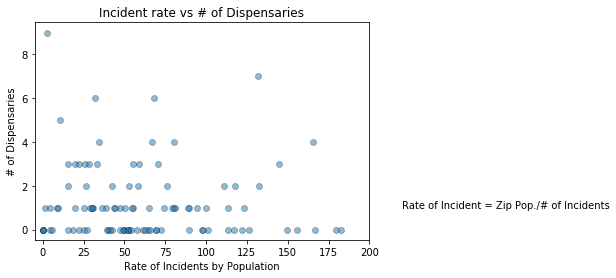

In [133]:
plt.scatter(City_Crime_Final['Incidents per capita'],City_Crime_Final['# of Dispensaries'],alpha =.5, linewidth= .5,edgecolors = 'black')
plt.xlim(-5,200)
plt.title('Incident rate vs # of Dispensaries')
plt.ylabel('# of Dispensaries')
plt.xlabel('Rate of Incidents by Population')
plt.text(220,1,"Rate of Incident = Zip Pop./# of Incidents")

In [134]:
crimedf_clean_2 = pd.merge(crimedf_clean, Dispendary_by_Zip_Clean, on='Zip Code',how='left').fillna('0')

Text(0.5, 0, 'Arrest Date')

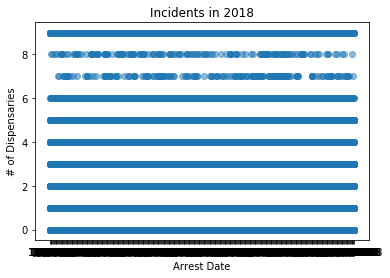

In [140]:
plt.scatter(crimedf_clean_2['Arrest Date'],crimedf_clean_2['# of Dispensaries'],alpha =.5)
plt.title('Incidents in 2018')
plt.ylabel('# of Dispensaries')
plt.xlabel('Arrest Date')
